In [1]:
data<-read.csv("/Users/mitalibhiwande/Desktop/DIC/June 10-July 12, 2015 - Gaming, Jobs and Broadband/pewdataact4.csv")

In [125]:
names(data)

[1] "psraid"     "sample"     "int_date"   "lang"       "usr"       
  [6] "cregion"    "state"      "form"       "sex"        "q1"        
 [11] "q3"         "eminuse"    "intmob"     "intfreq"    "home4nw"   
 [16] "bbhome1"    "bbhome2"    "bbhome3a"   "bbhome3b"   "bbhome3c"  
 [21] "bbhome3d"   "bbhome3e"   "device1a"   "smart1"     "q4"        
 [26] "bbsmart1"   "bbsmart2"   "bbsmart3a"  "bbsmart3b"  "bbsmart3c" 
 [31] "bbsmart3d"  "bbsmart3e"  "bbsmart3f"  "bbsmart4"   "cable1"    
 [36] "cable2"     "cable3a"    "cable3b"    "cable3c"    "act19"     
 [41] "act87a"     "act87b"     "act137"     "q5a"        "q5b"       
 [46] "q5c"        "q5d"        "q5e"        "q5f"        "date1a"    
 [51] "date2a"     "date3a"     "date3b"     "date4a"     "date4b"    
 [56] "date4c"     "date4d"     "date4e"     "date4f"     "game1"     
 [61] "game2a"     "game2b"     "game2c"     "game2d"     "game2e"    
 [66] "game2f"     "game3a"     "game3b"     "game4"      "emplnw"    
 [71] "emptype1"   "emptype2"   "emptype3"   "stud"       "job1a"     
 [76] "job1b"      "job1c"      "job1d"      "job1e"      "job1f"     
 [81] "job2"       "job3a"      "job3b"      "job3c"      "job3d"     
 [86] "job3e"      "job3f"      "job3g"      "job3h"      "job4"      
 [91] "smjob1"     "smjob2a"    "smjob2b"    "smjob2c"    "smjob2d"   
 [96] "smjob2e"    "smjob3"     "smjob4a"    "smjob4b"    "smjob4c"   
[101] "smjob4d"    "smjob4e"    "snsjob1a"   "snsjob1b"   "snsjob1c"  
[106] "snsjob2a"   "snsjob2b"   "job5a"      "job5b"      "job5c"     
[111] "job5d"      "auto1a"     "auto1b"     "auto1c"     "auto1d"    
[116] "auto1e"     "auto2"      "auto3"      "age"        "marital"   
[121] "hh1"        "par"        "kidage1"    "kidage2"    "kidage3"   
[126] "educ2"      "edinst"     "disa"       "party"      "partyln"   
[131] "ideo"       "hisp"       "birth_hisp" "race"       "inc"       
[136] "ql1a"       "qc1"        "zipcode"    "weight"     "standwt"

In [126]:
install.packages("sqldf")
install.packages("dplyr")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [127]:
library(sqldf)
library(dplyr)

In [128]:
broadband<-sqldf("select bbhome1,par,race,sex,educ2,bbsmart2 from data")
broadband[is.na(broadband)]<-0


## 1. How many white parents use high speed internet? 

Total,sex
129,1
132,2


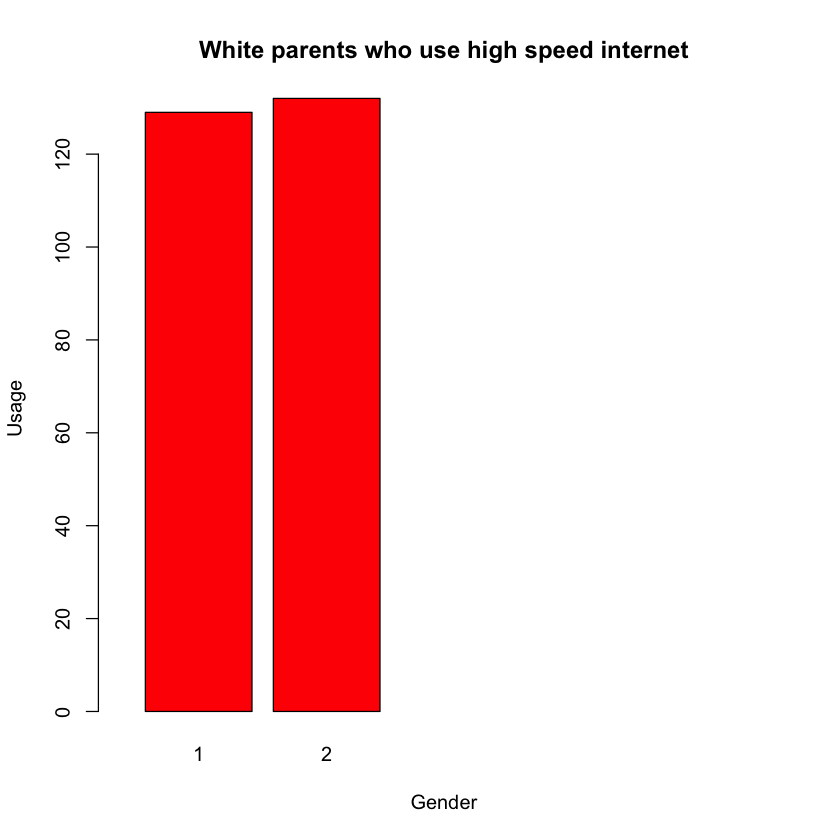

In [129]:
a<-sqldf("select sum(par) as Total, sex  from broadband where race=1 and bbhome1=2 and par=1 group by sex ")
head(a)
barplot(a$Total, names = a$sex,
  xlab = "Gender", ylab = "Usage",
  main = "White parents who use high speed internet",
  col=c("red"),width=10, xlim=c(0,60))

## 2. How many male students of different education status are not interested in having highspeed internet?

Total,students
19,1
15,2
102,3
27,4
13,5
20,6


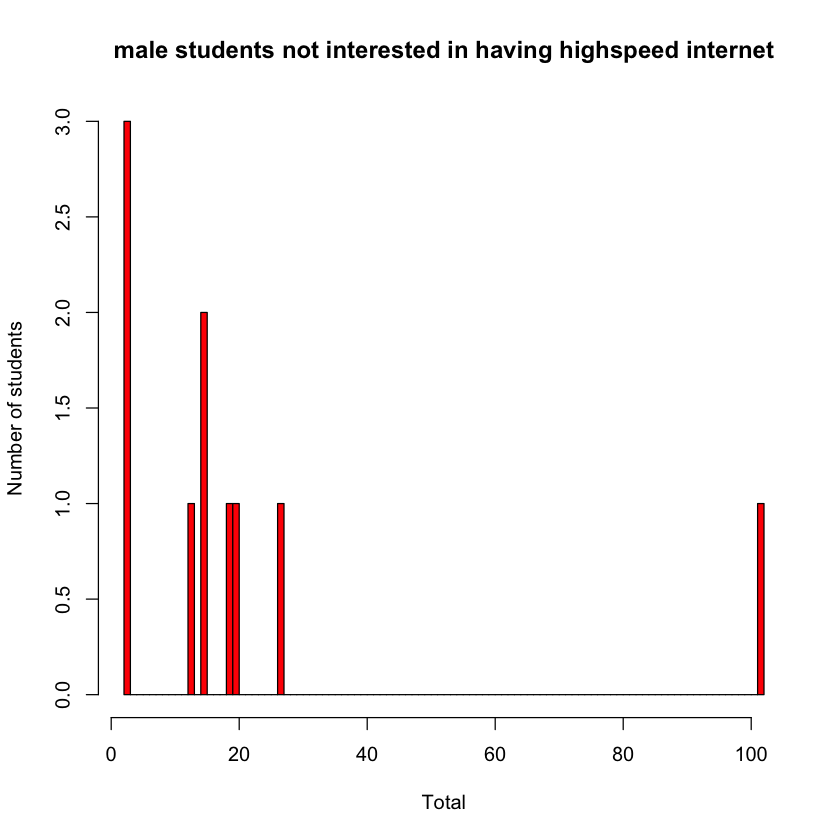

In [130]:
a<-sqldf("select * from broadband where sex=1")
a<-sqldf("select sum(sex) as Total, educ2 as students from a where bbsmart2=2 group by educ2  ")
head(a)
hist(a$Total, breaks=102, col="red", xlab = "Total", ylab = "Number of students",main="male students not interested in having highspeed internet") 

In [132]:
dating<-data[,c('educ2','date4e','sex','date1a','age','date2a','marital')]
dating[is.na(dating)]<-0 #cleared NA
dating$mstat[dating$marital==6]<-'Never been married'     #filled with values for different marital statuses
dating$mstat[dating$marital==5]<-'Widowed'
dating$mstat[dating$marital==4]<-'Separated'
dating$mstat[dating$marital==3]<-'Divorced'
dating$mstat[dating$marital==2]<-'Living with a partner'
dating$mstat[dating$marital==1]<-'Married'
dating$mstat[dating$marital==8]<-"Don't know"
dating$mstat[dating$marital==9]<-'Refused'
#grouping by age
a1829<-dating%>%select(educ2,date4e,sex,date1a,age,date2a,marital,mstat)%>%filter(age>=18 & age<=29)  
a3049<-dating%>%select(educ2,date4e,sex,date1a,age,date2a,marital,mstat)%>%filter(age>=30 & age<=49)
a5064<-dating%>%select(educ2,date4e,sex,date1a,age,date2a,marital,mstat)%>%filter(age>=50 & age<=64)
a65<-dating%>%select(educ2,date4e,sex,date1a,age,date2a,marital,mstat)%>%filter(age>=65 & age<=99)
a1829$ages<-'18-29'  #editing columns
a3049$ages<-'30-49'
a5064$ages<-'50-64'
a65$ages<-'65+'
datingfinal<-bind_rows(a1829,a3049,a5064,a65)
#binding by rows


## 3. How many students of different age groups think online dating is a good way of meeting people? 

Poll_by_students,age_groups
160,18-29
263,30-49
285,50-64
197,65+


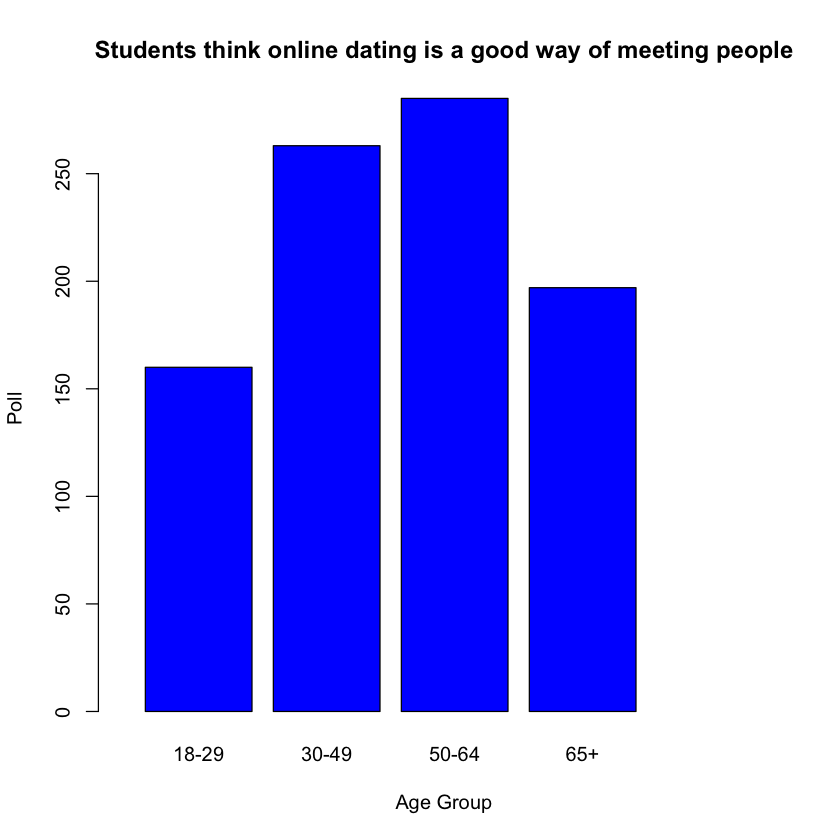

In [133]:
a<-sqldf("select count(educ2) as Poll_by_students,ages as age_groups  from datingfinal where date4e=1 group by ages")

head(a)
barplot(a$Poll_by_students, names = a$age_groups,
  xlab = "Age Group", ylab = "Poll",
  main = "Students think online dating is a good way of meeting people",
  col=c("blue"),width=10, xlim=c(0,60))

## 4. Based on marital status, how many people use online dating sites and also use it on smart phone?

Total,Marital_Status
8,Married
8,Living with a partner
14,Divorced
5,Separated
4,Widowed
49,Never been married


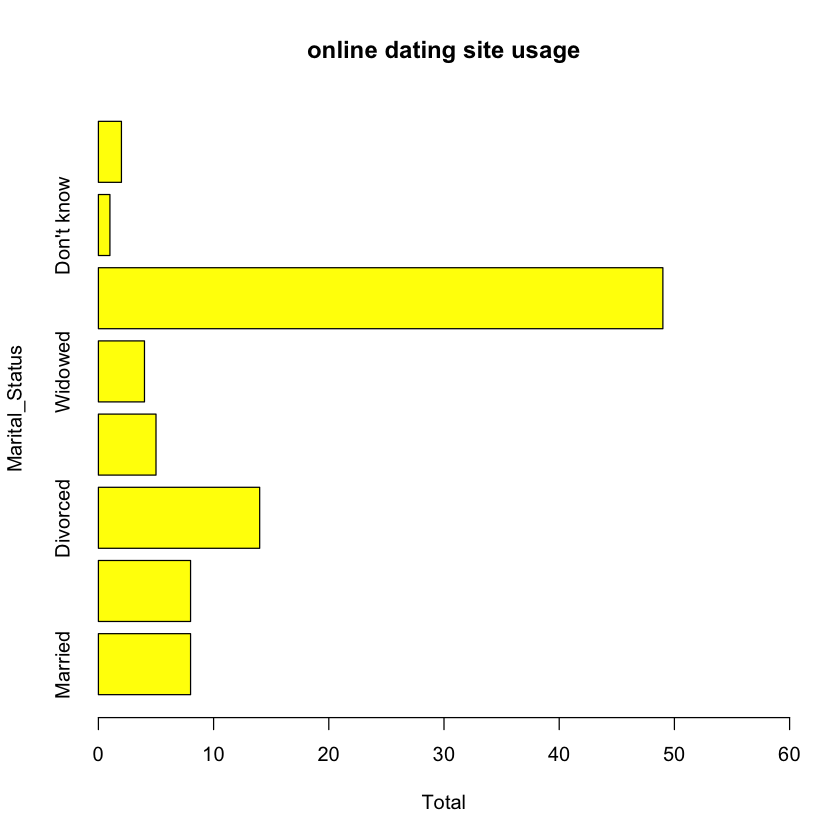

In [136]:
a<-sqldf("select count(educ2) as Total,mstat as Marital_Status from datingfinal where date1a=1 and date2a=1 group by marital")
head(a)

barplot(a$Total, names = a$Marital_Status, horiz = TRUE,
  ylab = "Marital_Status", xlab = "Total",
  main = "online dating site usage",
  col=c("yellow"),width=10, xlim=c(0,60))

## 5. How many people play video games are less likely to be violent and call themselves a gamer(agree/disagreee/don't know)?

,People,Gamer_Y_N_DK
2,122,1
3,432,2
4,6,8


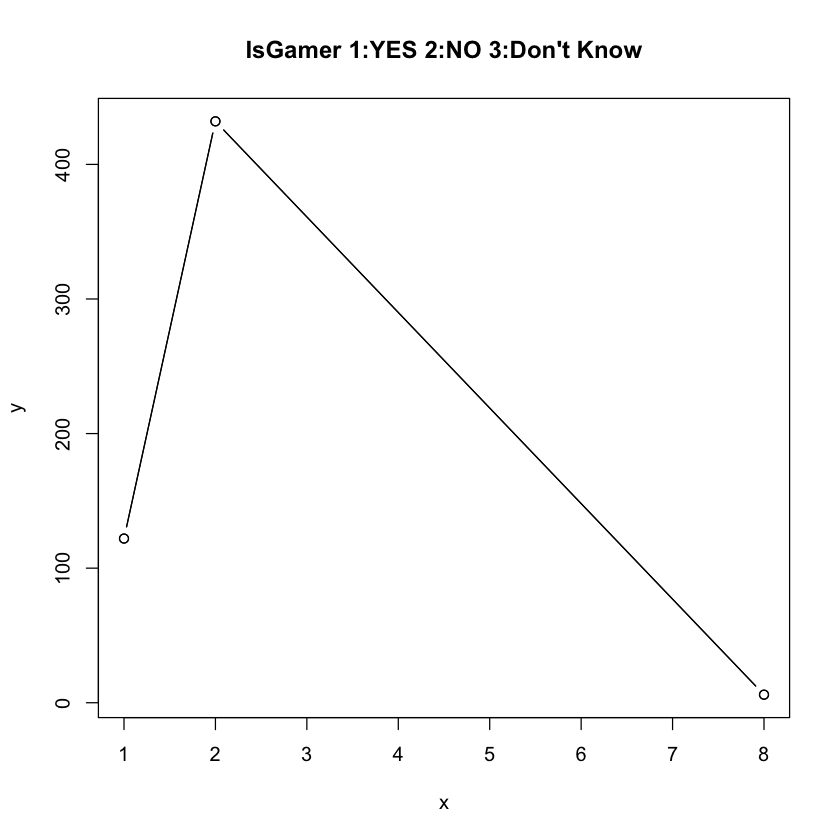

In [135]:
gaming<-data[,c('game3b','game4','sex','age')]
a<-sqldf("select count(game3b) as People,game4 as Gamer_Y_N_DK from gaming where game3b=2 group by game4")
a<-na.omit(a)
y<-a$People
x<-a$Gamer_Y_N_DK
plot(x, y, type="b", main="IsGamer 1:YES 2:NO 3:Don't Know") 
lines(x, y, type="b",
xlab="Number of People", ylab="Consider themselves as Gamers")
head(a)

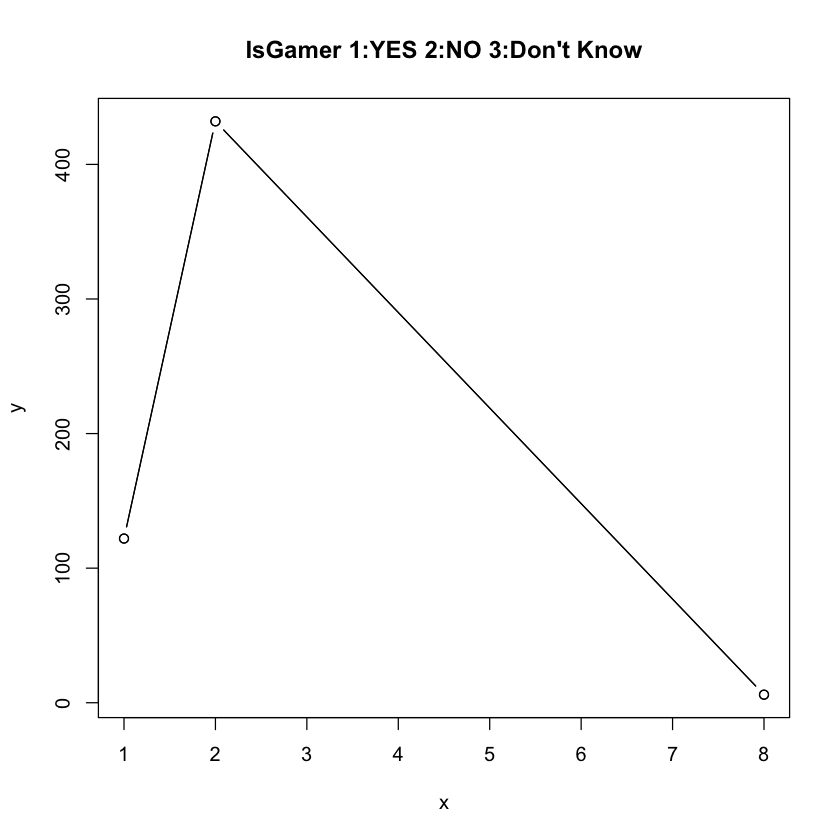

In [123]:
y<-a$People
x<-a$Gamer_Y_N_DK
plot(x, y, type="b", main="IsGamer 1:YES 2:NO 3:Don't Know") 
lines(x, y, type="b",
xlab="Number of People", ylab="Consider themselves as Gamers")



## References:
#### http://www.statmethods.net/graphs/creating.html
#### https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/barplot.html
#### https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/hist.html